# DTSA 5510 Final Project - Using chemical analysis to determine the origin of wines

## Data and Goal of the project

The data for this project are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. One can download the data file from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine) website for free.

- The **goal of this project** is, using only the 13 chemical constituents (without the info about the wine type), applying an unsupervised algorithm to verify the amount of wine types and to predict each one of them. The wine type from the data will be used only to measure the accuracy of the predictions at the end.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import ParameterGrid

data = pd.read_csv('wine.csv')
X = data.drop('Class', axis=1) # removes the field with the type of the wine (cultivar) from the data

### Data shape: 178 samples of wine and 13 features (chemical constituents)

In [2]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Exploratory Data Analysis (EDA)

### Inspect

The data doesn't have any missing values for all features.

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
X.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Visualize
The data doesn't show any outliers also.

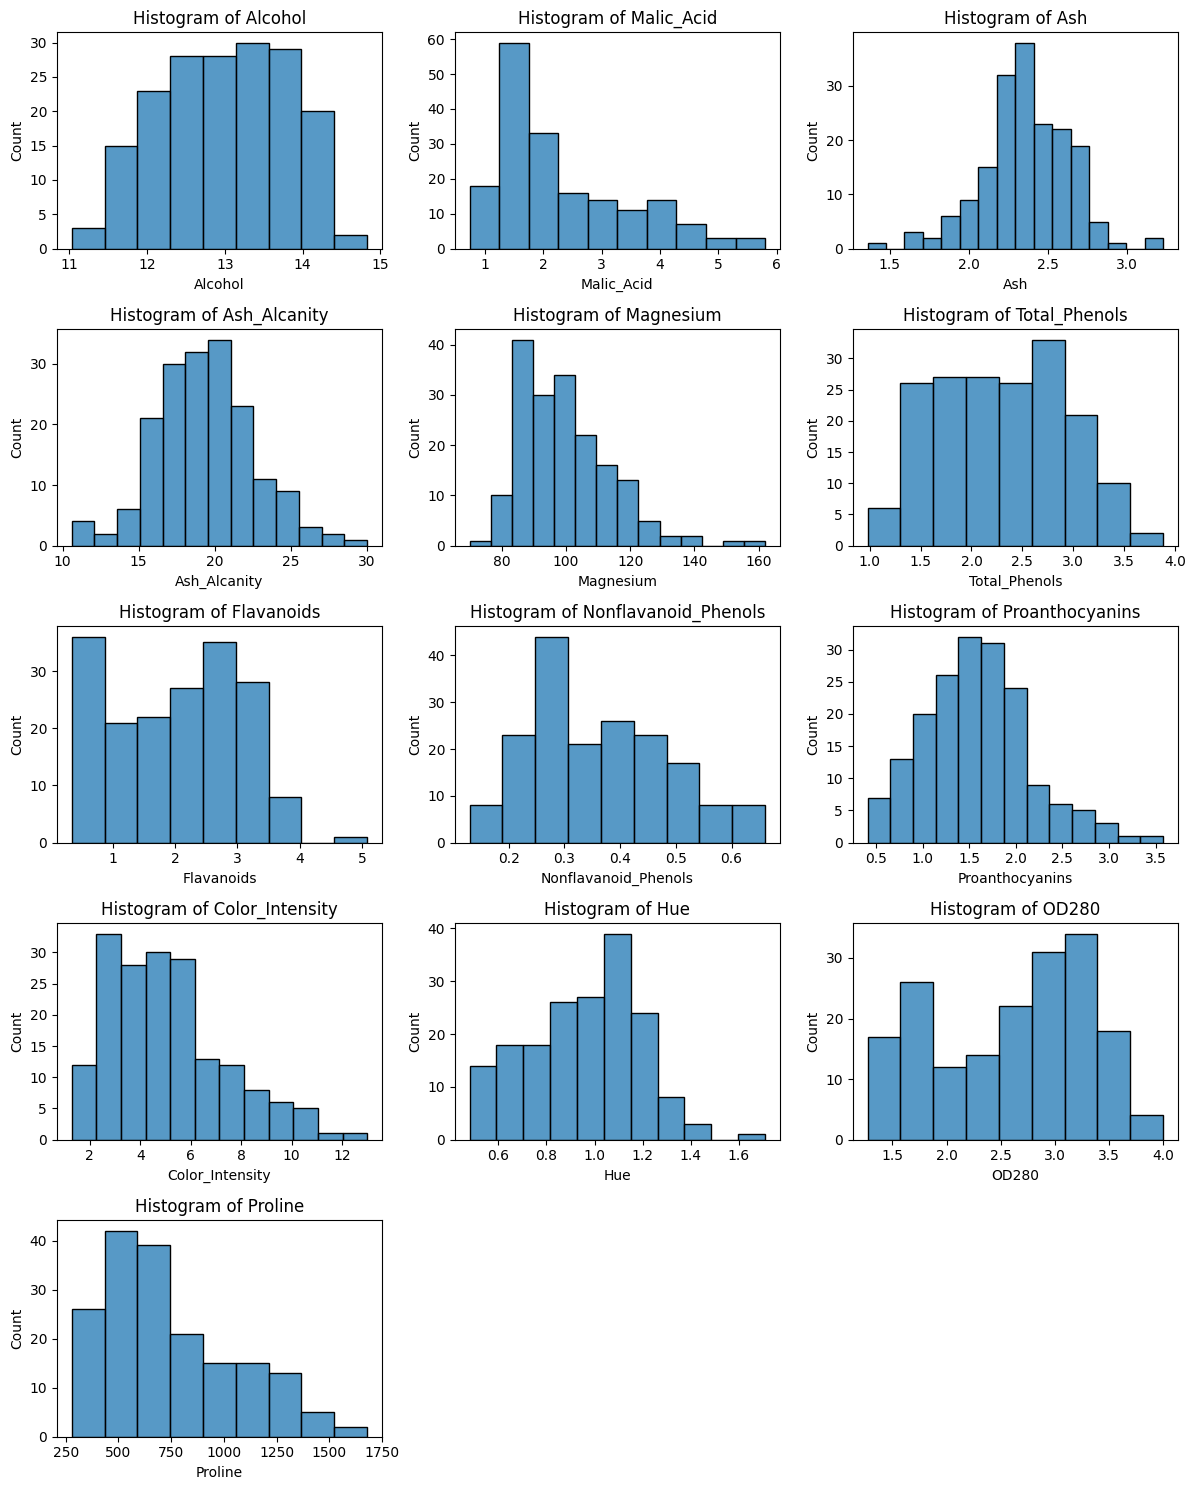

In [5]:
# Plot a histogram for each column
fig, axes = plt.subplots(5, 3, figsize=(12, 15))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Clean the Data

By the histograms above it's possible to see that the features have well behaved distributions, however in very different scales. As I am planning to cluster the data, then I applied the StandardScaler on the features to normalize them.

In [6]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


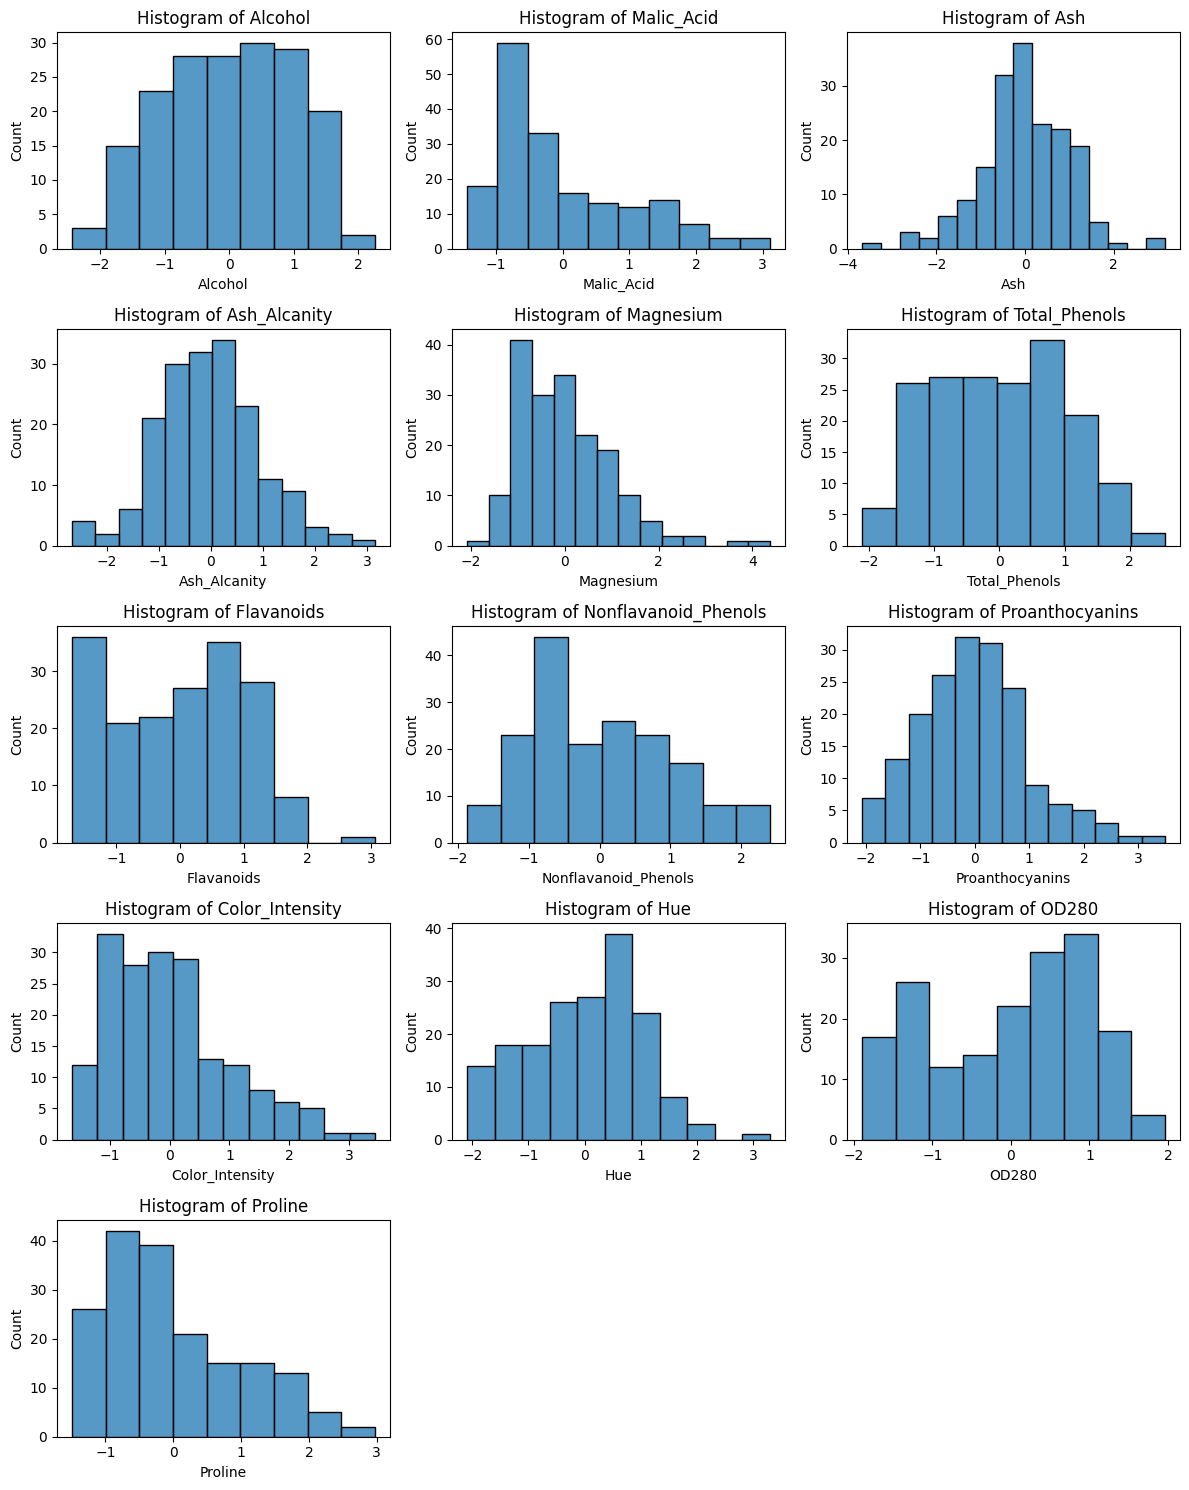

In [7]:
# Plot a histogram for each column
fig, axes = plt.subplots(5, 3, figsize=(12, 15))
axes = axes.flatten()
for i, col in enumerate(X_scaled.columns):
    sns.histplot(X_scaled[col], ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Model building and training

The idea is to cluster the data using the 13 chemical constituents to verify the most likely existing amount of wine types. 

For this I started with a simple approach (KMeans) to measure the quality of clusters for different numbers of clusters.

### Inertia by number of clusters (K-Means clustering)

The smaller the better, but following the idea of the Elbow method, we choose the number of clusters where the improvement starts to be marginal 

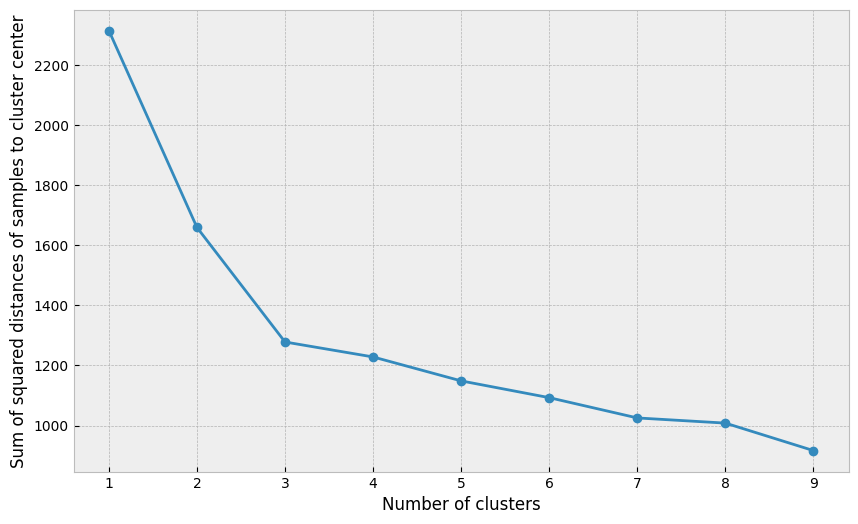

In [8]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init='auto', random_state=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances of samples to cluster center')
plt.xticks(ks)
plt.show()

### Silhouette score by number of clusters (K-Means clustering)

The biggest the better, considering the caveat that choosing less clusters as possible is usually the ideal

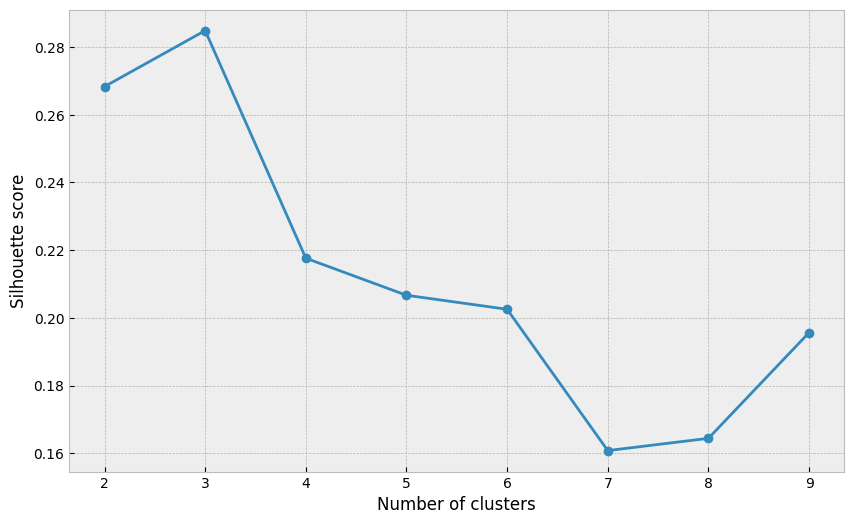

In [9]:
ks = range(2, 10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k, n_init='auto', random_state=10)
    model.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, model.labels_))

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(ks, scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.show()

### Hyperparameter tuning with 3 clusters

Following the results of the analysis above, the idea now is comparing different clustering methods for 3 clusters

The quality of the clustering will be measured by the following metrics:

- Calinski-Harabasz Index (Variance Ratio Criterion): Measures the ratio of the sum of between-cluster dispersion and of within-cluster dispersion. It accounts for both the separation of clusters and their compactness. Range: Higher values indicate better-defined clusters.

- Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. It considers the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. Range: [-1, 1] (1 indicates that the points are well clustered, 0 indicates that clusters are overlapping, and negative values indicate that points might be in the wrong cluster).

In [10]:
# Clustering methods and their parameters
param_grid = {
    'hierarchical': {
        'model': [AgglomerativeClustering],
        'n_clusters': [3],
        'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
        'linkage': ['complete', 'average', 'single']
    },
    'kmeans': {
        'model': [KMeans],
        'n_clusters': [3],
        'algorithm': ['lloyd', 'elkan'],
        'init': ['k-means++', 'random'],
        'random_state': [1]
    },
    'spectral': {
        'model': [SpectralClustering],
        'n_clusters': [3],
        'eigen_solver': ['arpack', 'lobpcg', 'amg'],
        'affinity': ['nearest_neighbors','rbf'],
        'random_state': [1]
    },
    'kmedoids': {
        'model': [KMedoids],
        'n_clusters': [3],
        'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
        'method': ['pam', 'alternate'],
        'init': ['k-medoids++', 'random', 'heuristic'],
        'random_state': [1]
    }
}

# Iterate over each clustering method's parameter grid
results = []
for method_name, params in param_grid.items():
    for param in ParameterGrid(params):
        model = param.pop('model')(**param).fit(X_scaled)
        labels = model.labels_

        silhouette = silhouette_score(X_scaled, labels)
        calinski = calinski_harabasz_score(X_scaled, labels)

        results.append({
            "Method": method_name,
            "Parameters": param,
            "Silhouette Score": silhouette,
            "Calinski-Harabasz Index": calinski
        })


results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
results_df.sort_values('Silhouette Score', ascending=False).head(20)

,Method,Parameters,Silhouette Score,Calinski-Harabasz Index
15,kmeans,"{'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 3, 'random_state': 1}",0.285942,70.836887
17,kmeans,"{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 3, 'random_state': 1}",0.285942,70.836887
18,kmeans,"{'algorithm': 'elkan', 'init': 'random', 'n_clusters': 3, 'random_state': 1}",0.284859,70.940008
16,kmeans,"{'algorithm': 'lloyd', 'init': 'random', 'n_clusters': 3, 'random_state': 1}",0.284859,70.940008
21,spectral,"{'affinity': 'nearest_neighbors', 'eigen_solver': 'amg', 'n_clusters': 3, 'random_state': 1}",0.282850,70.041067
20,spectral,"{'affinity': 'nearest_neighbors', 'eigen_solver': 'lobpcg', 'n_clusters': 3, 'random_state': 1}",0.282850,70.041067
19,spectral,"{'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack', 'n_clusters': 3, 'random_state': 1}",0.282850,70.041067
44,kmedoids,"{'init': 'random', 'method': 'alternate', 'metric': 'cosine', 'n_clusters': 3, 'random_state': 1}",0.281662,69.802447
34,kmedoids,"{'init': 'k-medoids++', 'method': 'alternate', 'metric': 'cosine', 'n_clusters': 3, 'random_state': 1}",0.281662,69.802447
54,kmedoids,"{'init': 'heuristic', 'method': 'alternate', 'metric': 'cosine', 'n_clusters': 3, 'random_state': 1}",0.280269,69.597728


### Best model

In [11]:
best_model = KMeans(n_clusters=3, init='k-means++', algorithm = 'lloyd', random_state = 1)
best_model.fit(X_scaled)

print("Silhouette Score", silhouette_score(X_scaled, best_model.labels_))
print("Calinski-Harabasz Index", calinski_harabasz_score(X_scaled, best_model.labels_))

best_model

Silhouette Score 0.28594199657074876
Calinski-Harabasz Index 70.83688657175372


KMeans(n_clusters=3, random_state=1)

### Predicting the wine types with the best model

In [12]:
data['Cluster'] = best_model.labels_
data.groupby('Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Class
Cluster,,,,,,,,,,,,,,
0,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848,2.000000
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,2.941176
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,1.032787


Mapping for Cluster to Class {0: 2, 1: 3, 2: 1}
Accuracy of the predicted class (Cluster): 0.9719101123595506


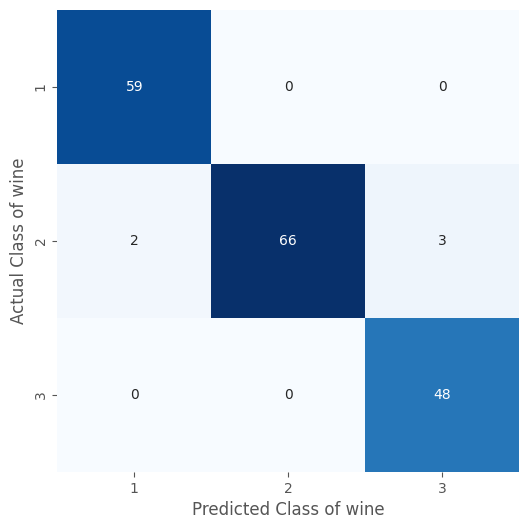

In [13]:
map_cluster_to_class = data.groupby('Cluster')[['Class']].mean().round().astype(int)['Class'].to_dict()
print("Mapping for Cluster to Class", map_cluster_to_class)

data['Class_predicted'] = data['Cluster'].map(map_cluster_to_class)

print("Accuracy of the predicted class (Cluster):", accuracy_score(data['Class'], data['Class_predicted']))
cm = pd.crosstab(data['Class'], data['Class_predicted'])

plt.figure(figsize=(6, 6))
plt.style.use('ggplot')
sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='.0f', cbar=False)
plt.xlabel('Predicted Class of wine', fontsize=12)
plt.ylabel('Actual Class of wine', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

### Visualizing the predicted wine types

#### PCA

Using PCA to reduce the dimensions of the data to the 2 most important features, we can visualize then how the samples of wine (color: predicted classes) are distributed along these features.

<Axes: xlabel='PCA Component 1', ylabel='PCA Component 2'>

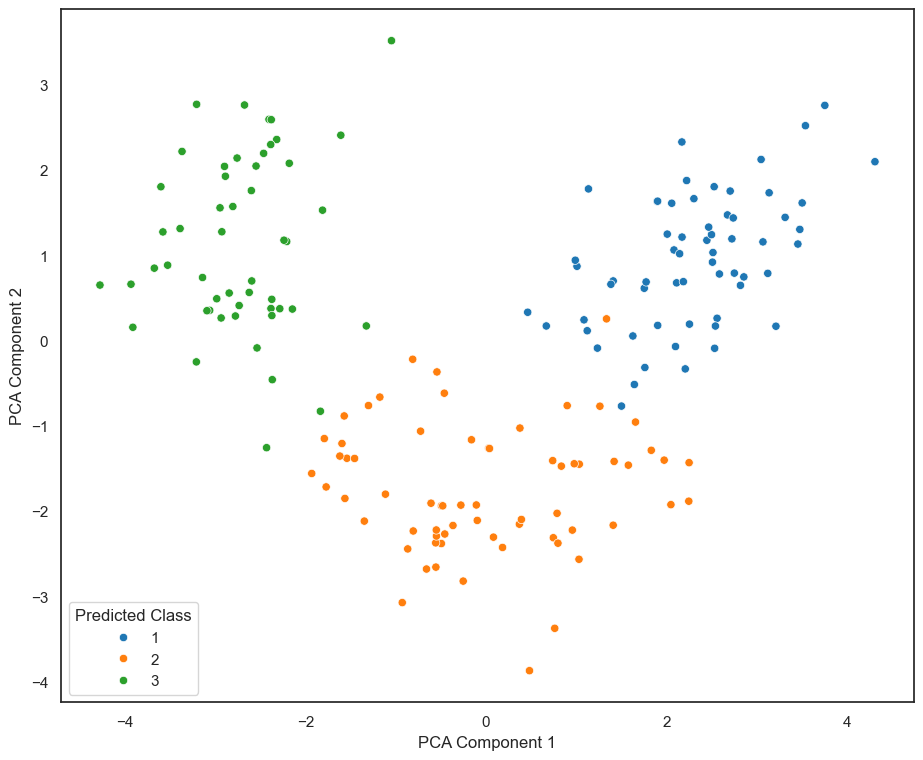

In [14]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
transformed = pd.DataFrame(pca.transform(X_scaled), columns=['PCA Component 1', 'PCA Component 2'])
transformed['Predicted Class'] = data['Class_predicted']

# show only most hightest 2 variance components
plt.figure(figsize=(11, 9))
sns.set_theme(style="white")
sns.scatterplot(data=transformed, x='PCA Component 1', y='PCA Component 2', hue='Predicted Class', palette='tab10')

#### All columns combinations

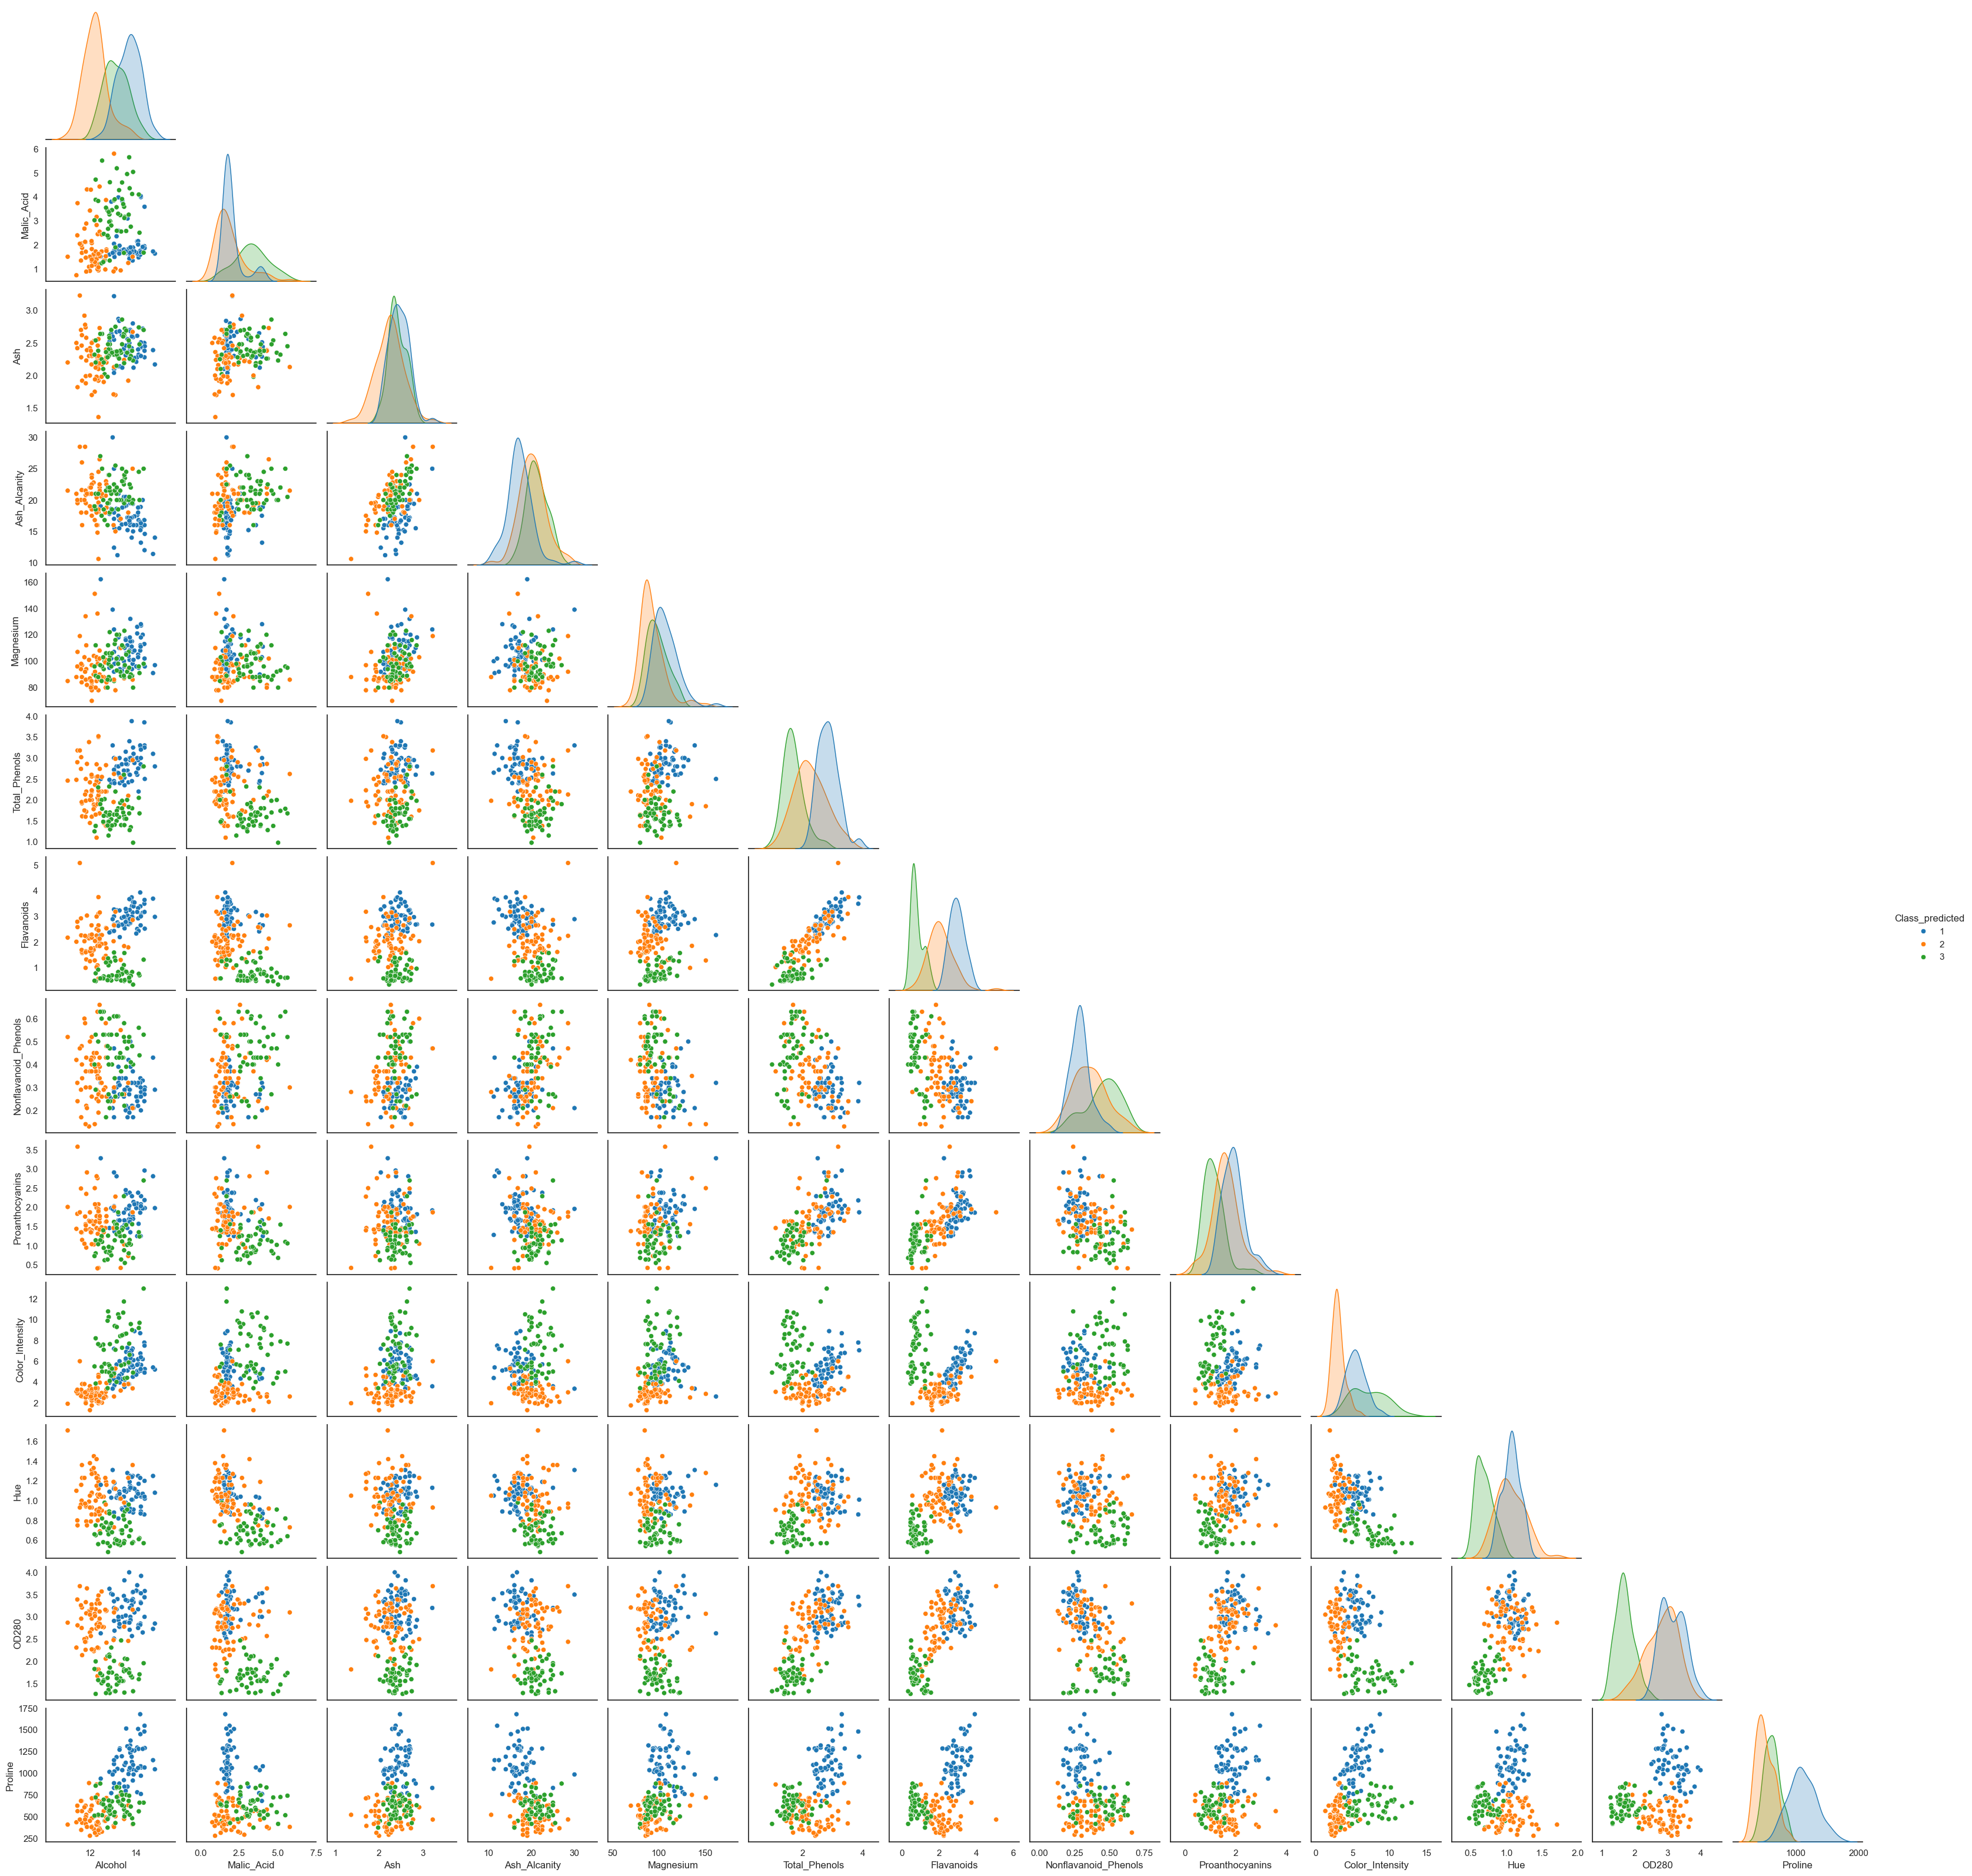

In [15]:
sns.pairplot(data, hue="Class_predicted", vars=X.columns, corner=True, palette='tab10')

## Conclusion

- Even comparing multiple different clustering methods, the old and good K-Means showed to be the best for this dataset

- Both Inertia and Silhouette were very good for discovering the amount of wine types

- The chemical constituents of wines from this dataset were enough to find, almost perfectly (97% acc), the three different cultivars only using an unsupervised method

- Next steps could be trying different ways of scaling and normalizing the original data (I used only StandardScaler)